In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [47]:
data = pd.read_csv('data.csv')
data

,y,X1,X2
0,0,0.523605,1.012345
1,0,0.486128,1.171291
2,2,0.470516,1.103335
3,2,0.486586,1.354944
4,3,0.426709,1.150893
5,3,0.376597,1.154817
6,0,0.379694,1.231407
7,0,0.409645,1.106822
8,1,0.343714,1.220705
9,2,0.454609,1.057892


In [25]:
df1 = data.loc[data.y.isin([0,1])]
X = df1[['X1', 'X2']].values
y = df1.y

y[y==0] = -1
y

/home/romain/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/romain/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0      -1
1      -1
6      -1
7      -1
8       1
11      1
12      1
13     -1
16     -1
20      1
23     -1
24      1
26     -1
27      1
28      1
30     -1
33     -1
36     -1
40     -1
41      1
42      1
43      1
44      1
45     -1
46      1
47     -1
49      1
51      1
56     -1
58      1
       ..
977    -1
981    -1
982    -1
984    -1
985    -1
986     1
988     1
989    -1
990    -1
992    -1
996     1
997    -1
998    -1
1000    1
1002    1
1003    1
1012    1
1013    1
1015   -1
1016   -1
1017    1
1018    1
1020    1
1023    1
1024    1
1026   -1
1027    1
1029    1
1032   -1
1035   -1
Name: y, Length: 515, dtype: int64

In [10]:
X_train = X[:180]
y_train = y[:180]
X_test = X[180:]
y_test = y[180:]

In [28]:
model_LR = LinearRegression(fit_intercept=True)

In [12]:
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
np.all((model_LR.predict(X_train)>0) == (y_train>0))

False

In [15]:
(*model_LR.coef_,model_LR.intercept_)

(-1.032014721182094, 0.083505604843746181, 0.37275727051278268)

In [32]:
def trace(X, y, w):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired', s=100)
    scale = [np.min(X[:,0]), np.max(X[:,0])]
    plt.plot(scale,[[(-w[0]-w[1]*i)/w[2]] for i in scale])

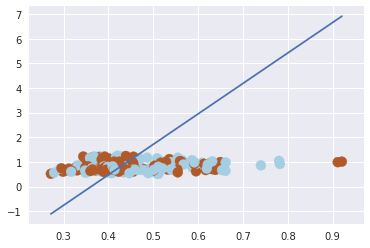

In [17]:
trace(X_train, y_train, (model_LR.intercept_, *model_LR.coef_))

In [18]:
np.all((model_LR.predict(X_test)>0) == (y_test>0))

False

In [19]:
np.sum((model_LR.predict(X_test)>0) == (y_test>0))/X_test.shape[0]

0.53731343283582089

In [20]:
model_LR.score(X_test, y_test)

-0.012863313214048542

In [50]:
df2 = data.loc[data.y.isin([1,3])]
X2 = df2[['X1', 'X2']].values
y2 = df2.y

y2[y2==3] = -1

X_train2 = X2[:180]
y_train2 = y2[:180]
X_test2 = X2[180:]
y_test2 = y2[180:]

/home/romain/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/romain/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
y2

4      -1
5      -1
8       1
11      1
12      1
19     -1
20      1
24      1
27      1
28      1
29     -1
34     -1
35     -1
37     -1
38     -1
39     -1
41      1
42      1
43      1
44      1
46      1
48     -1
49      1
50     -1
51      1
54     -1
55     -1
57     -1
58      1
61     -1
       ..
979    -1
986     1
987    -1
988     1
994    -1
995    -1
996     1
1000    1
1002    1
1003    1
1005   -1
1006   -1
1007   -1
1008   -1
1010   -1
1012    1
1013    1
1014   -1
1017    1
1018    1
1020    1
1021   -1
1023    1
1024    1
1025   -1
1027    1
1029    1
1030   -1
1031   -1
1034   -1
Name: y, Length: 517, dtype: int64

In [52]:
model_LR = LinearRegression(fit_intercept=True)
model_LR.fit(X_train2, y_train2)
np.all((model_LR.predict(X_train2)>0) == (y_train2>0))

False

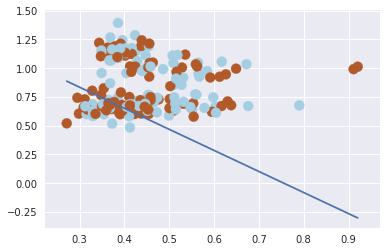

In [53]:
trace(X_train2, y_train2, (model_LR.intercept_, *model_LR.coef_))

In [54]:
from sklearn.linear_model import SGDClassifier

In [62]:
model_SGD = SGDClassifier(random_state=42, max_iter=100000)
model_SGD.fit(X_train2, y_train2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [63]:
print(model_SGD.score(X_train2, y_train2))
print(model_SGD.score(X_test2, y_test2))

0.511111111111
0.507418397626


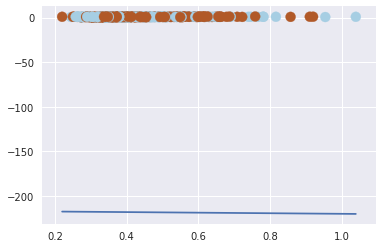

In [64]:
trace(X, y, (*model_SGD.intercept_.flat, *model_SGD.coef_.flat))

In [65]:
model_SGD = SGDClassifier(loss="squared_loss", max_iter=100000,
                          random_state=42)

In [60]:
model_SGD.fit(X_train2, y_train)
print(model_SGD.score(X_train, y_train))
print(model_SGD.score(X_test, y_test))

0.544444444444
0.534328358209


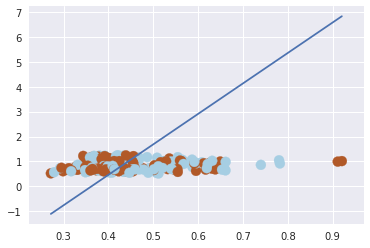

In [61]:
trace(X_train, y_train, (*model_SGD.intercept_.flat, *model_SGD.coef_.flat))